In [1]:
import pandas as pd

In [5]:
latest_navcen=pd.read_csv('NAVCEN_16aug2025.csv')

In [6]:
latest_navcen

,Index,Disruption Date,Location,Type,Description,Cause,Closed Date
0,758,10/16/2025,"Easton, Maryland",Automobile,"USER: Upon entering zone listed above, gps dir...",Mapping Issue,10/21/2024
1,886,07/20/2025,Strait Of Hormuz,Marine,USER: During Strait of Hormuz passage vessel e...,Unknown Interference,07/28/2025
2,883,07/19/2025,Hormuz Straight,NaN,USER: GPS Spoofing at hormoz straits\nNAVCEN: ...,Unknown Interference,07/28/2025
3,880,07/14/2025,Southern Red Sea,Marine,USER: Lack of fix possition. Spoofing experien...,Unknown Interference,07/21/2025
4,879,07/12/2025,"JEDDAH, Saudi Arabia",Marine,USER: 12th July 2025 at 1651 utc in position 2...,Unknown Interference,07/21/2025
...,...,...,...,...,...,...,...
713,8,01/05/2017,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019
714,20,01/03/2017,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019
715,1,01/02/2017,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019
716,2,01/01/2017,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019


<Axes: ylabel='Location'>

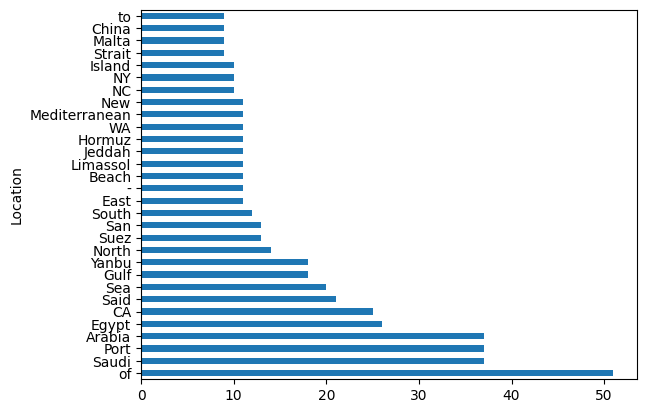

In [18]:
latest_navcen.Location.str.split().explode().str.strip(',').value_counts().sort_values(ascending=False).iloc[0:30].plot(kind='barh')